## 图像读取

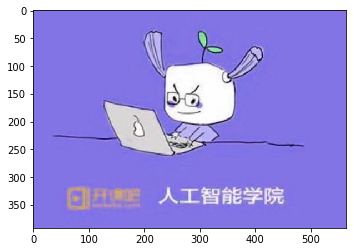

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('W.jpeg', cv2.IMREAD_COLOR)
# 直接显示，因为OpenCV为BGR，plt为 RGB
%matplotlib inline
plt.imshow(img)
plt.show()

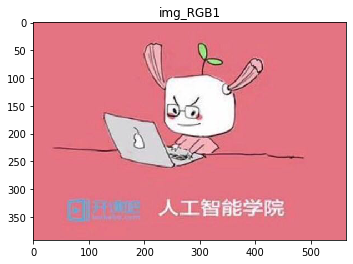

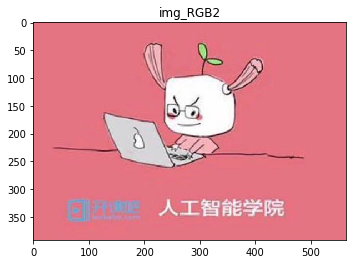

In [2]:
# 以RGB显示
img_RGB1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
%matplotlib inline
plt.imshow(img_RGB1)
plt.title("img_RGB1")
plt.show()

img_RGB2 = img[:,:,(2,1,0)]
plt.imshow(img_RGB2)
plt.title("img_RGB2")
plt.show()

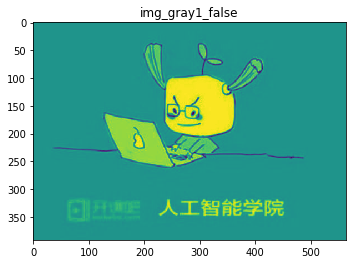

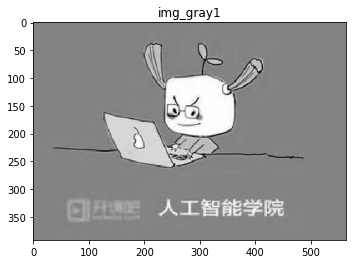

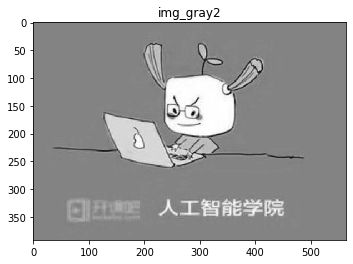

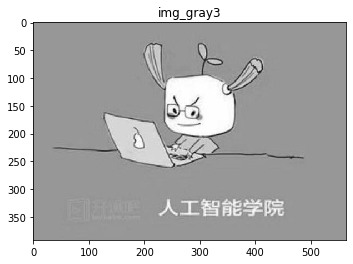

In [3]:
# 以灰度显示

img_gray1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
%matplotlib inline
plt.imshow(img_gray1)
plt.title("img_gray1_false")
plt.show()

plt.imshow(img_gray1, 'gray')
plt.title("img_gray1")
plt.show()

r,g,b = [img[:,:,i] for i in range(3)]
img_gray2 = r*0.299+g*0.587+b*0.114
plt.imshow(img_gray2, 'gray')
plt.title("img_gray2")
plt.show()

img_gray3 = cv2.imread('W.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray3, 'gray')
plt.title("img_gray3")
plt.show()


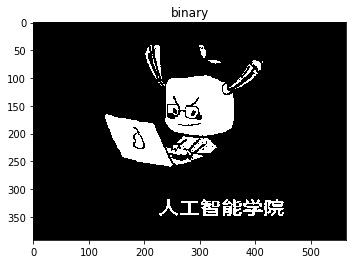

In [4]:
# 以黑白显示
# 阈值
threshold = 180
_, img_binary = cv2.threshold(img_gray1, threshold, 255, cv2.THRESH_BINARY)
%matplotlib inline
plt.imshow(img_binary, 'gray')
plt.title("binary")
plt.show()

# OpenCV 文档：https://docs.opencv.org

163.0


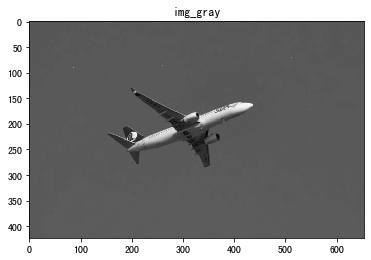

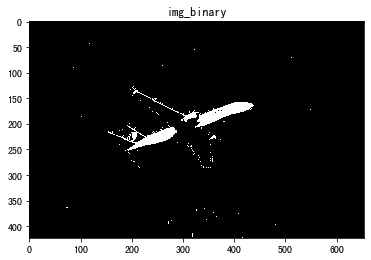

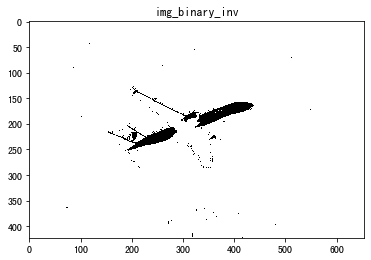

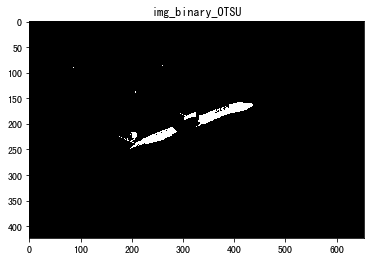

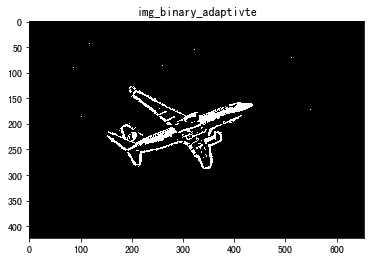

In [35]:
# 最简单的目标检测，图像分割
# 全局阈值
# 固定阈值
img_gray_1 = cv2.imread("test1.png", cv2.IMREAD_GRAYSCALE)
threshold = 121 # 121
_, img_binary = cv2.threshold(img_gray_1, threshold, 255, cv2.THRESH_BINARY)
_, img_binary_inv = cv2.threshold(img_gray_1, threshold, 255, cv2.THRESH_BINARY_INV)
value, img_binary_OTSU = cv2.threshold(img_gray_1, threshold, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# dst=cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
img_adaptive = cv2.adaptiveThreshold(img_gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, -3) # 13 -3

print(value)
%matplotlib inline
plt.imshow(img_gray_1, 'gray')
plt.title("img_gray")
plt.show()

plt.imshow(img_binary, 'gray')
plt.title("img_binary")
plt.show()

plt.imshow(img_binary_inv, 'gray')
plt.title("img_binary_inv")
plt.show()

plt.imshow(img_binary_OTSU, 'gray')
plt.title("img_binary_OTSU")
plt.show()

plt.imshow(img_adaptive, 'gray')
plt.title("img_binary_adaptivte")
plt.show()

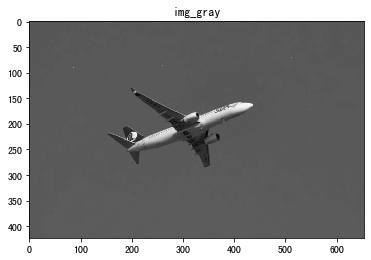

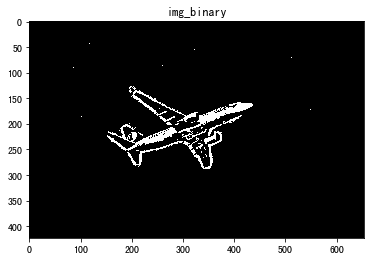

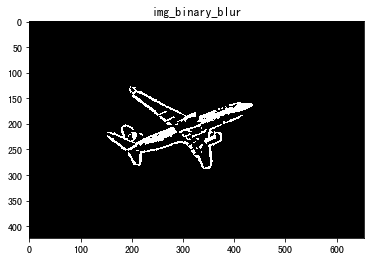

In [36]:
# 滤波后阈值分割
img_gray_1 = cv2.imread("test1.png", cv2.IMREAD_GRAYSCALE)

# dst=cv.medianBlur(src, ksize[, dst])
img_gray_1_blur = cv2.medianBlur(img_gray_1, 3)

img_adaptive = cv2.adaptiveThreshold(img_gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, -3) # 13 -3
img_adaptive_blur = cv2.adaptiveThreshold(img_gray_1_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, -3) # 13 -3

%matplotlib inline
plt.imshow(img_gray_1, 'gray')
plt.title("img_gray")
plt.show()

plt.imshow(img_adaptive, 'gray')
plt.title("img_binary")
plt.show()

plt.imshow(img_adaptive_blur, 'gray')
plt.title("img_binary_blur")
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


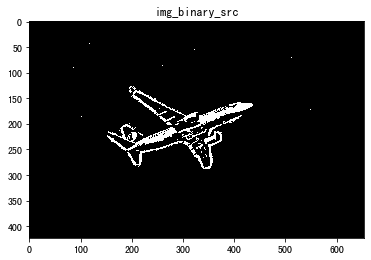

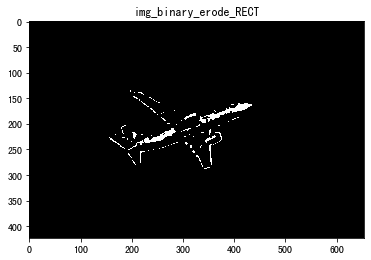

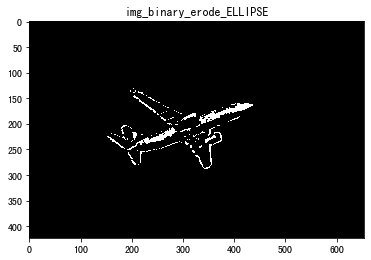

In [11]:
# eroded = cv2.erode(RedThresh,kernel)        #腐蚀图像

# 获取结构元素方法1

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
print(kernel1)
print(kernel2)
img_adaptive_erode_RECT = cv2.erode(img_adaptive, kernel1)
img_adaptive_erode_ELLIPSE = cv2.erode(img_adaptive, kernel2)
%matplotlib inline
plt.imshow(img_adaptive, 'gray')
plt.title("img_binary_src")
plt.show()

plt.imshow(img_adaptive_erode_RECT, 'gray')
plt.title("img_binary_erode_RECT")
plt.show()

plt.imshow(img_adaptive_erode_ELLIPSE, 'gray')
plt.title("img_binary_erode_ELLIPSE")
plt.show()

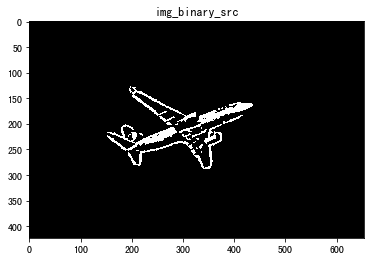

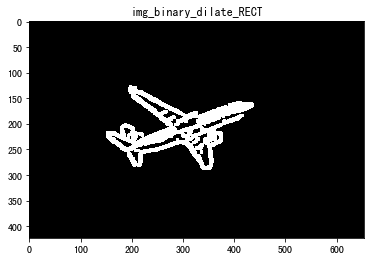

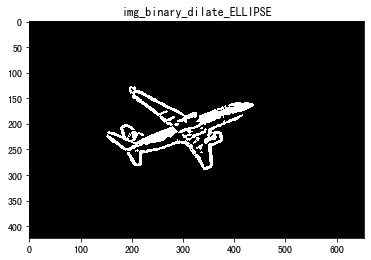

In [12]:
# dilated = cv2.dilate(RedThresh,kernel)      #膨胀图像
# 获取结构元素方法2

kernel3 = np.ones((5,5), dtype=np.uint8) # 

kernel4 = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]], dtype=np.uint8)

img_adaptive_dilate_RECT = cv2.dilate(img_adaptive_blur, kernel3)
img_adaptive_dilate_ELLIPSE = cv2.dilate(img_adaptive_blur, kernel4)

%matplotlib inline
plt.imshow(img_adaptive_blur, 'gray')
plt.title("img_binary_src")
plt.show()

plt.imshow(img_adaptive_dilate_RECT, 'gray')
plt.title("img_binary_dilate_RECT")
plt.show()

plt.imshow(img_adaptive_dilate_ELLIPSE, 'gray')
plt.title("img_binary_dilate_ELLIPSE")
plt.show()


29
1


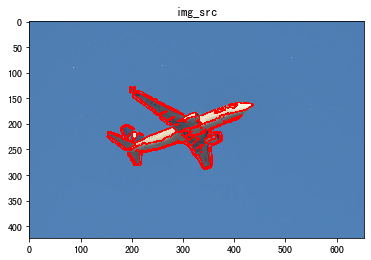

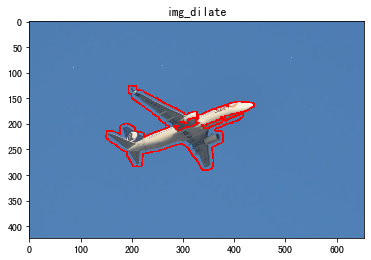

In [13]:
# 目标检测
# cv2.RETR_EXTERNAL表示只检测外轮廓
# cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
# cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息

img = cv2.imread("test1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image1, contours1, hierarchy1 = cv2.findContours (img_adaptive_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image2, contours2, hierarchy2 = cv2.findContours (img_adaptive_dilate_RECT, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 该函数还可返回一个可选的hiararchy结果，这是一个ndarray，其中的元素个数和轮廓个数相同，每个轮廓contours[i]对应4个hierarchy元素hierarchy[i][0] ~hierarchy[i][3]，分别表示后一个轮廓、前一个轮廓、父轮廓、内嵌轮廓的索引编号，如果没有对应项，则该值为负数

print(len(contours1))
print(len(contours2))
# cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset ]]]]])
# 第三个参数指定绘制轮廓list中的哪条轮廓，如果是-1，则绘制其中的所有轮廓。后面的参数很简单。其中thickness表明轮廓线的宽度，如果是-1（cv2.FILLED），则为填充模式
img1 = np.copy(img)
cv2.drawContours(img1,contours1,-1,(255,0,0),2)
img2 = np.copy(img)
cv2.drawContours(img2,contours2,-1,(255,0,0),2)

%matplotlib inline
plt.imshow(img1)
plt.title("img_src")
plt.show()

plt.imshow(img2)
plt.title("img_dilate")
plt.show()

(150, 125, 290, 166)
((291.3780517578125, 216.4196319580078), (156.064453125, 278.4474182128906), -82.04511260986328)


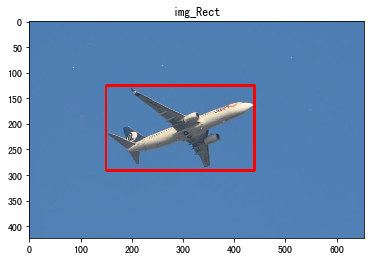

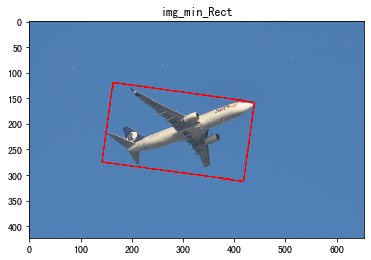

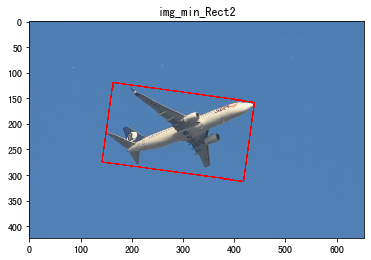

In [16]:
# 生成外接矩形

# 生成矩形边框（Bounding Rectangle）、，用一个最小的矩形，把找到的形状包起来。
rect1 = cv2.boundingRect(contours2[0]) # 返回四个值，分别是x，y，w，h；
print(rect1)
x1, y1, w1, h1 = rect1
img1 = np.copy(img)
img1 = cv2.rectangle(img1, (x1,y1), (x1+w1,y1+h1), (255,0,0),3)


# 生成最小外接矩形，带旋转的矩形，面积更小
rect2 = cv2.minAreaRect(contours2[0]) # 得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
print(rect2)
(x2, y2), (w2, h2), a = rect2
box_points = cv2.boxPoints(rect2) # cv2.boxPoints(rect) for OpenCV 3.x 获取最小外接矩形的4个顶点坐标
img2 = np.copy(img)
box_points = np.int0(box_points)
img2 = cv2.drawContours(img2, [box_points], -1, (255,0,0),2)

img3 = np.copy(img)
for i in range(4):
    cv2.line(img3, tuple(box_points[i]), tuple(box_points[(i+1)%4]), (255,0,0),2)


%matplotlib inline
plt.imshow(img1)
plt.title("img_Rect")
plt.show()

plt.imshow(img2)
plt.title("img_min_Rect")
plt.show()

plt.imshow(img3)
plt.title("img_min_Rect2")
plt.show()

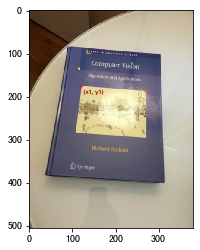

In [17]:
# 利用颜色信息分割

%matplotlib inline
# Read in the image
img = cv2.imread('test2.png')
# Change color to RGB (from BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 绘制RGB颜色通道

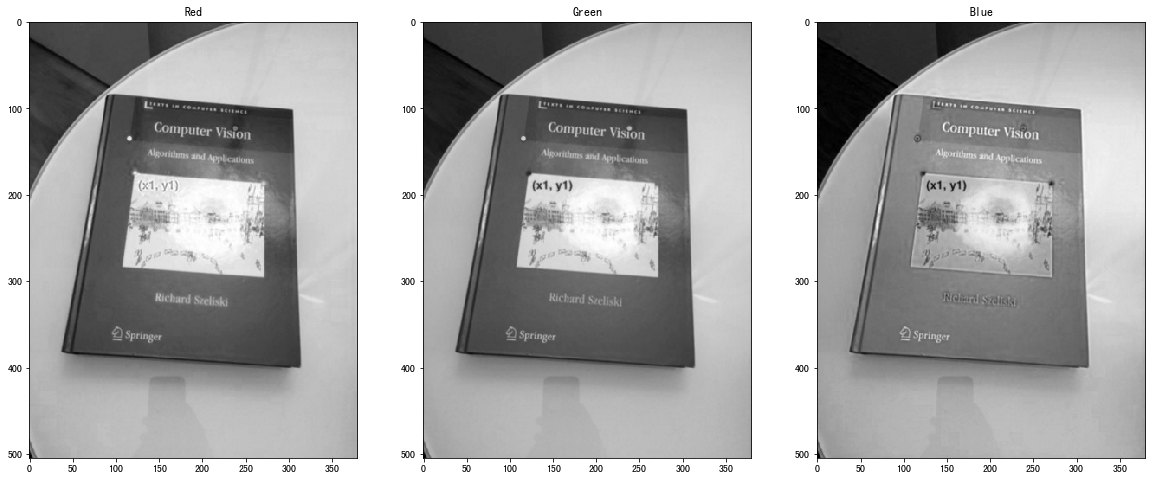

In [18]:

#RGB channels
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10)) #生成一个一行三列的f图像.

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

# 绘制HSV空间

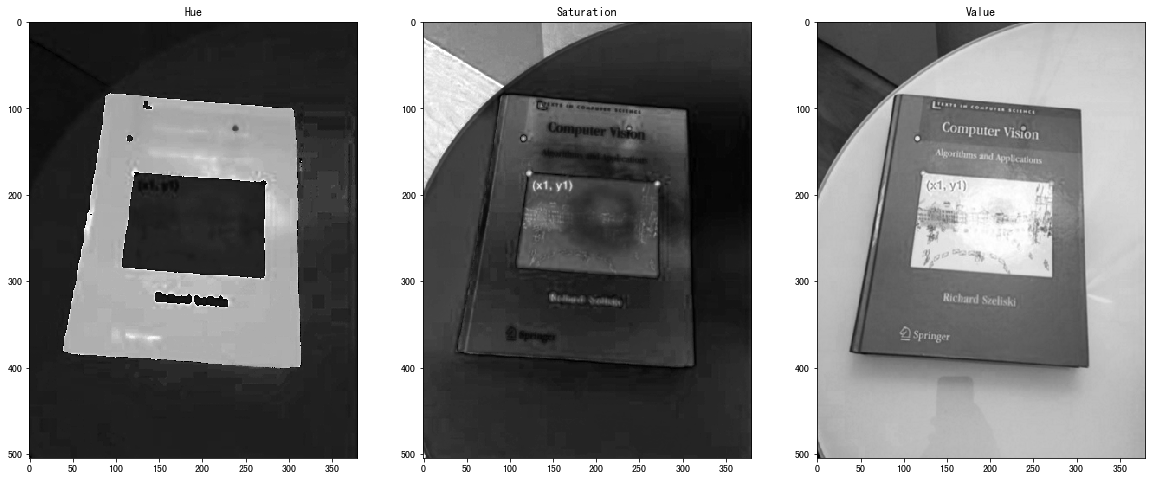

In [19]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

# 设置色彩空间选择阈值

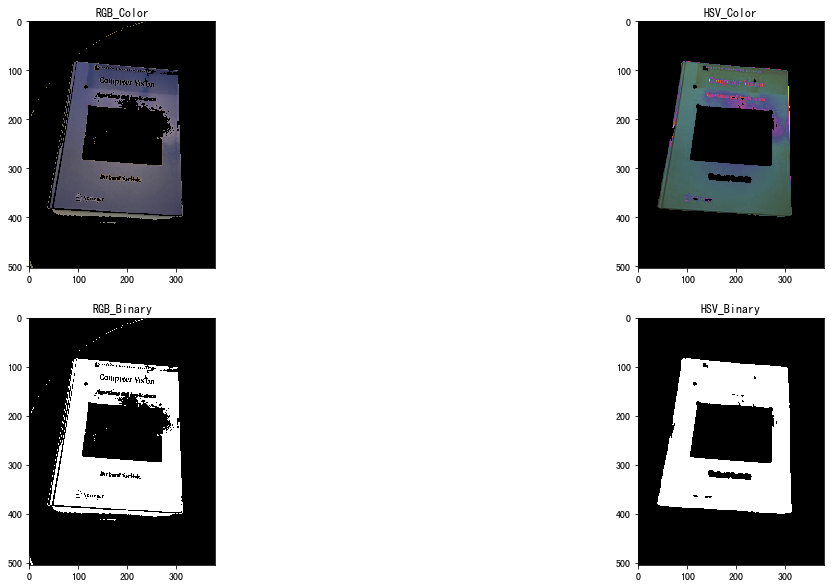

In [20]:
# Define our color selection criteria in RGB values
lower_RGB = np.array([50,50,80]) 
upper_RGB = np.array([140,130,140])

# Define our color selection criteria in HSV values
lower_HSV = np.array([65,5,5], dtype=np.int) 
upper_HSV = np.array([150,255,255], dtype=np.int)



mask_RGB = cv2.inRange(img, lower_RGB, upper_RGB)
# mask the image
masked_img_RGB = np.copy(img)
masked_img_RGB[mask_RGB==0] = [0,0,0]
masked_binary_RGB = cv2.cvtColor(masked_img_RGB, cv2.COLOR_RGB2GRAY)
masked_binary_RGB[masked_binary_RGB>0]= 255

# Define the masked area in HSV space
mask_HSV = cv2.inRange(hsv, lower_HSV, upper_HSV)
# mask the image
masked_img_HSV = np.copy(img)
masked_img_HSV[mask_HSV==0] = [0,0,0]
masked_img_HSV = cv2.cvtColor(masked_img_HSV, cv2.COLOR_HSV2RGB)
masked_binary_HSV = cv2.cvtColor(masked_img_HSV, cv2.COLOR_RGB2GRAY)
masked_binary_HSV[masked_binary_HSV>0]= 255


f, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].set_title('RGB_Color')
axs[0,0].imshow(masked_img_RGB, cmap='gray')

axs[0,1].set_title('HSV_Color')
axs[0,1].imshow(masked_img_HSV, cmap='gray')

axs[1,0].set_title('RGB_Binary')
axs[1,0].imshow(masked_binary_RGB, cmap='gray')

axs[1,1].set_title('HSV_Binary')
axs[1,1].imshow(masked_binary_HSV, cmap='gray')


# 提取最小外接矩形

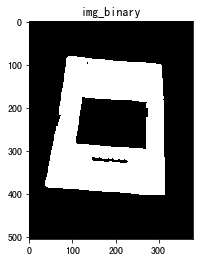

In [21]:
element1 = np.ones((3,3))
element2 = np.ones((7,7))
img_binary = cv2.erode(masked_binary_HSV, element1)
img_binary = cv2.dilate(img_binary, element2)


plt.title('img_binary')
plt.imshow(img_binary, cmap='gray')

# contourArea和arcLength方法可以得到检测物体轮廓的面积和周长

[[[ 87  84]
  [ 37 381]
  [313 401]
  [306 100]]]


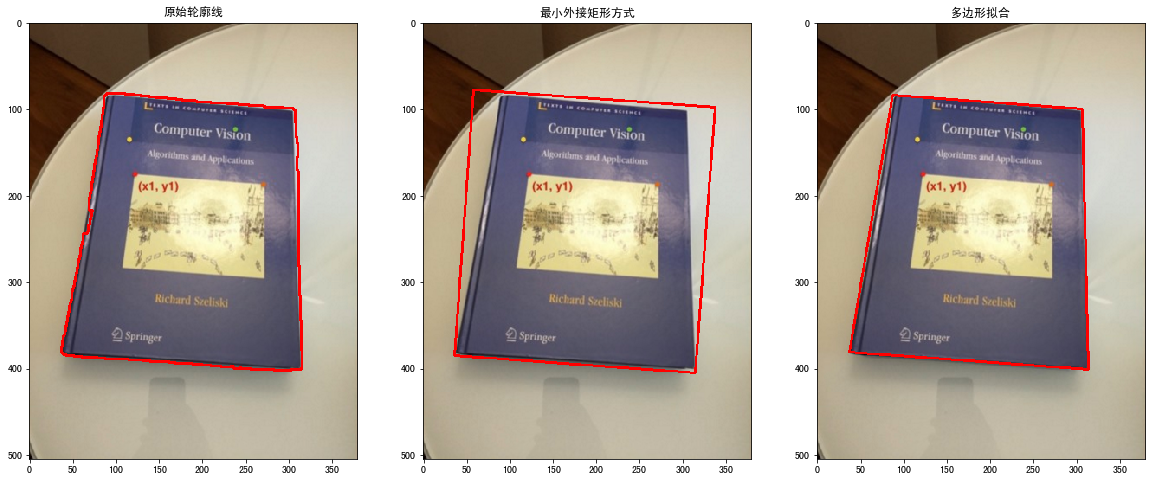

In [22]:
image, contours, hierarchy = cv2.findContours (img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 原始轮廓线
img_box1 = np.copy(img)
cv2.drawContours(img_box1, contours, -1, (255, 0, 0), 2)


# 用最小外接矩形的方式
img_box2 = np.copy(img)
rect = cv2.minAreaRect(contours[0]) # 得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
box = cv2.boxPoints(rect)
box_int = np.int64(box)
cv2.drawContours(img_box2, [box_int], -1, (255, 0, 0), 2)


# 多边形拟合
# approxPolyDP(InputArray curve, OutputArray approxCurve, double epsilon, bool closed)
# InputArray curve:一般是由图像的轮廓点组成的点集
# OutputArray approxCurve：表示输出的多边形点集
# double epsilon：主要表示输出的精度，就是另个轮廓点之间最大距离数，5,6,7，，8，，,,，
# bool closed：表示输出的多边形是否封闭
img_box3 = np.copy(img)
for c in contours:
    peri = cv2.arcLength(c, True)
    rects = cv2.approxPolyDP(c, 0.1 * peri, True)
    rects = rects.reshape((1, 4, 2))
    cv2.drawContours(img_box3, rects, -1, (255, 0, 0), 2)
print(rects)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('原始轮廓线')
ax1.imshow(img_box1)

ax2.set_title('最小外接矩形方式')
ax2.imshow(img_box2)

ax3.set_title('多边形拟合')
ax3.imshow(img_box3)


# 根据得到的特征点进行矫正

未删除空余纬度原始点
[[[ 87  84]
  [ 37 381]
  [313 401]
  [306 100]]]
删除空余纬度原始点
[[ 37. 381.]
 [ 87.  84.]
 [306. 100.]
 [313. 401.]]
目标点
[[ 62.  391. ]
 [ 62.   92. ]
 [309.5  92. ]
 [309.5 391. ]]
(505, 380, 3)


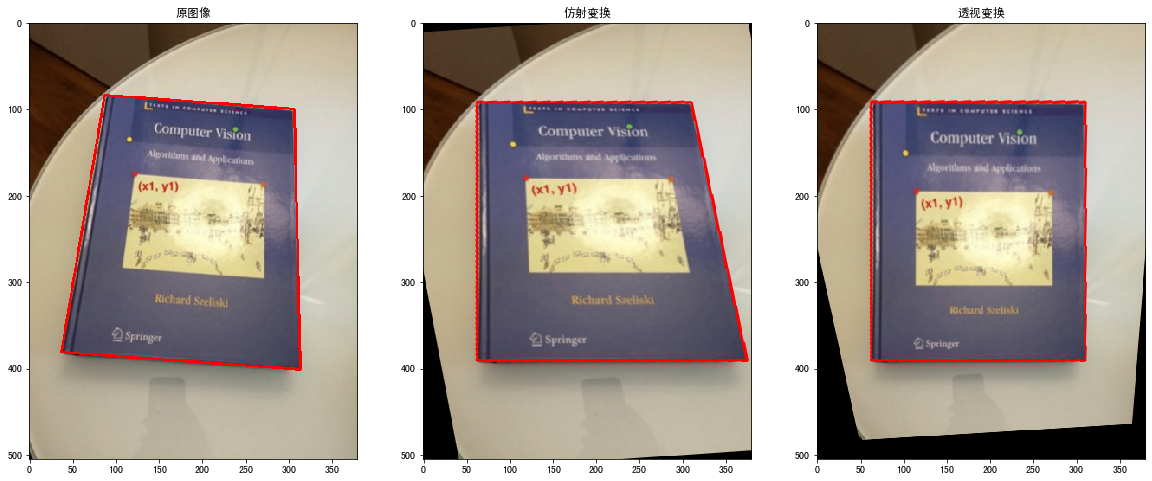

In [24]:
# 删除空余纬度
print('未删除空余纬度原始点\n{}'.format(rects))
rects_src = np.squeeze(rects)
rects_src = np.float32(sorted(rects_src, key=lambda x:x[0]))
print('删除空余纬度原始点\n{}'.format(rects_src))
x = [i[0] for i in rects_src]
x.sort()
y = [i[1] for i in rects_src]
y.sort()
top, left, bottom, right = 0.5*(y[0]+y[1]), 0.5*(x[0]+x[1]), 0.5*(y[2]+y[3]), 0.5*(x[2]+x[3])
rects_dst = np.float32([[left,bottom],[left,top],[right,top],[right,bottom]])
print('目标点\n{}'.format(rects_dst))
print(img_box3.shape)
# 仿射变换
# cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
M1 = cv2.getAffineTransform(rects_src[0:3], rects_dst[0:3])
dst1 = cv2.warpAffine(img_box3, M1, (img_box3.shape[1], img_box3.shape[0]))

# 透视变换
M2 = cv2.getPerspectiveTransform(rects_src, rects_dst)
dst2 = cv2.warpPerspective(img_box3, M2, (img_box3.shape[1], img_box3.shape[0]))

%matplotlib inline
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('原图像')
ax1.imshow(img_box3)

ax2.set_title('仿射变换')
ax2.imshow(dst1)

ax3.set_title('透视变换')
ax3.imshow(dst2)



## 演示实验

# Anaconda包管理

### 导入清华镜像源

In [25]:
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main/
conda config --set show_channel_urls yes

SyntaxError: invalid syntax (<ipython-input-25-e25728c70469>, line 1)

### 创建名为name，python版本为3.7的虚拟环境

In [ ]:
# conda create -n name python=3.7

# 查询已有的虚拟环境
# 

# conda info -e

# 复制环境
# conda create --name new_env_name --clone old_env_name

# 删除环境
# conda remove --name target_env_name --all

### 进入虚拟环境，退出虚拟环境

In [ ]:
### Windows MAC 有不同
# source activate name
# source deactivate name

# conda activate name
# conda deactivate

### 进入虚拟环境后输入jupyter notebook，启动jupyter不受其他环境干扰

### 安装删除依赖包

In [ ]:
# conda install package_name
# conda remove package_name

# 或者pip
# pip install opencv-python=3
# pip uninstall opencv-python
# pip list

# Windows可以去网站 https://www.lfd.uci.edu/~gohlke/pythonlibs/  下载对应的包